##  <u> *Data Modelling*  </u>

In [ ]:
%run 3_EDA.ipynb

---

### <u>*Calssifications Modelling for gender as a Target Feature*</u>

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import (
    r2_score,accuracy_score,roc_auc_score,auc,roc_curve,precision_score,
    recall_score,precision_recall_curve,r2_score,classification_report,RocCurveDisplay,
    confusion_matrix,f1_score,ConfusionMatrixDisplay
    )

from sklearn.svm import SVR,SVC
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from catboost import CatBoostRegressor,CatBoostClassifier
from xgboost import XGBRegressor,XGBRFRegressor,XGBClassifier,XGBRFClassifier
import warnings
from catboost import CatBoostRegressor,CatBoostClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingRegressor,
    RandomForestClassifier,
    GradientBoostingClassifier
)

from hyperopt import fmin,tpe,STATUS_OK,Trials,hp
from sklearn.utils.multiclass import unique_labels
import plotclassification ,plotly
# import matplotlib.pyplot as plt
from yellowbrick.classifier import ClassificationReport

### *C.* <u>*gender as a Target Feature :*</u>

#### *C.1*<br> <u>*Basic Models Comparison :*</u>

##### *C.1.1*<br> <u>*Models :*</u>

In [10]:
models = {
                "Random Forest": RandomForestClassifier(),
                "Decision Tree": DecisionTreeClassifier(),
                "Gradient Boosting": GradientBoostingClassifier(),
                "XGBRegressor": XGBClassifier(),
                "CatBoosting Regressor": CatBoostClassifier(verbose=False),
                "AdaBoost Regressor": AdaBoostClassifier(),
            }

##### *C.1.2*<br> <u>*Prepare Date :*</u>

In [11]:
LabelEncoder_cat = LabelEncoder()
df_gender=df.copy()
df_gender["gender"]=LabelEncoder_cat.fit_transform(df_gender["gender"])
x_gender=df_gender.drop("gender",axis=1)
y_gender= df_gender["gender"]


xtrain_full,xtest_full, ytrain, ytest = train_test_split(x_gender, y_gender, train_size=0.8, test_size=0.2,random_state=0)

numerical_cols = [col for col in xtrain_full.columns if xtrain_full[col].dtype in ['int64', 'float64']]
categorical_cols =[col for col in xtrain_full.columns if  xtrain_full[col].dtype == "object"]

my_cols = categorical_cols + numerical_cols
xtrain = xtrain_full[my_cols].copy()
xtest = xtest_full[my_cols].copy()

numerical_transformer = Pipeline(steps=[
    ("scaler",StandardScaler())
    ])


categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ("scaler",StandardScaler(with_mean=False))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

##### *C.1.3*<br> <u>*Apply Models :*</u>

In [12]:
def Cat_evaluate_model(true, predicted):
    AccuracyScore = accuracy_score(true, predicted)
    
    return AccuracyScore

###################################################

model_list = []
accurecy_list =[]
#mae_list=[]
#aucScore_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model =my_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('melbourne_model', model)
        
                             ])
    
    model.fit(xtrain, ytrain) 

    y_train_pred = model.predict(xtrain)
    y_test_pred = model.predict(xtest)

    model_train_AccuracyScore = Cat_evaluate_model(ytrain, y_train_pred)
    model_test_AccuracyScore = Cat_evaluate_model(ytest, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy Score: {:.4f}".format(model_train_AccuracyScore))
    


    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy Score: {:.4f}".format(model_test_AccuracyScore))
   
 
    accurecy_list.append(model_test_AccuracyScore)
    #aucScore_list.append(model_test_aucScore)
    #mae_list.append(model_test_mae)
    
    print('='*35)
    print('\n')



Random Forest
Model performance for Training set
- Accuracy Score: 0.9974
----------------------------------
Model performance for Test set
- Accuracy Score: 0.5931


Decision Tree
Model performance for Training set
- Accuracy Score: 0.9975
----------------------------------
Model performance for Test set
- Accuracy Score: 0.5593


Gradient Boosting
Model performance for Training set
- Accuracy Score: 0.6509
----------------------------------
Model performance for Test set
- Accuracy Score: 0.6424


XGBRegressor
Model performance for Training set
- Accuracy Score: 0.6950
----------------------------------
Model performance for Test set
- Accuracy Score: 0.6405


CatBoosting Regressor
Model performance for Training set
- Accuracy Score: 0.6820
----------------------------------
Model performance for Test set
- Accuracy Score: 0.6423


AdaBoost Regressor
Model performance for Training set
- Accuracy Score: 0.6457
----------------------------------
Model performance for Test set
- Accurac

##### *C.1.4*<br> <u>*Best Model :*</u>

In [14]:
pd.DataFrame(list(zip(model_list,accurecy_list)), 
             columns=['Model Name', 'accurecy']).sort_values(by=["accurecy"],ascending=False)

,Model Name,accurecy
2,Gradient Boosting,0.642352
4,CatBoosting Regressor,0.642278
3,XGBRegressor,0.640510
5,AdaBoost Regressor,0.639552
0,Random Forest,0.593133
1,Decision Tree,0.559313


##### *C.1.5*<br> <u>*Apply Best Model :*</u>

In [114]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('melbourne', GradientBoostingClassifier())# or ('melbourne_model', RandomForestRegressor(random_state=0,n_estimators=50)) 
                             ])
my_pipeline.fit(xtrain, ytrain)
preds = my_pipeline.predict(xtest)

##### *C.1.6*<br> <u>*classification_report - Best Model :*</u>

In [224]:
print(classification_report(ytest,preds,labels=["0","1"]))

              precision    recall  f1-score   support

           0       0.65      0.82      0.72      7683
           1       0.63      0.42      0.50      5889

   micro avg       0.64      0.64      0.64     13572
   macro avg       0.64      0.62      0.61     13572
weighted avg       0.64      0.64      0.63     13572



In [117]:
print("- Accuracy : ",
      accuracy_score(ytest, preds))
print('='*35)

print("- Precision Score \n (Positive Predictive Power) = True Positives / (True Positives + False Positives) :\n ", 
      precision_score(ytest, preds, average='weighted'))
print('='*35)
print("- Recall Score \n (True Positive Rate)  = True Positives / (True Positives + False Negatives) :\n ",
      recall_score(ytest, preds, average='weighted'))
print('='*35)
print("- F1-Score: ",
      f1_score(ytest, preds, average='weighted'))
print('='*35)
print("-Precision Score :")
print(f"The ratio of True Females amoung Predicted True Females {6233/(6233+3442)}")
print(f"The ratio of True Males amoung Predicted True Males {2447/(1450+2447)}")

print('='*35)
print("-recall Score :")
print(f"The ratio of True Females amoung all Females {6233/(6233+1450)}")
print(f"The ratio of True Males amoung all Males {2447/(3442+2447)}")
print('='*35)

- Accuracy :  0.6423519009725907
- Precision Score 
 (Positive Predictive Power) = True Positives / (True Positives + False Positives) :
  0.6406541471420621
- Recall Score 
 (True Positive Rate)  = True Positives / (True Positives + False Negatives) :
  0.6423519009725907
- F1-Score:  0.6259273965234131
-Precision Score :
The ratio of True Females amoung Predicted True Females 0.6442377260981912
The ratio of True Males amoung Predicted True Males 0.6279189119835771
-recall Score :
The ratio of True Females amoung all Females 0.8112716386828062
The ratio of True Males amoung all Males 0.4155204618780778


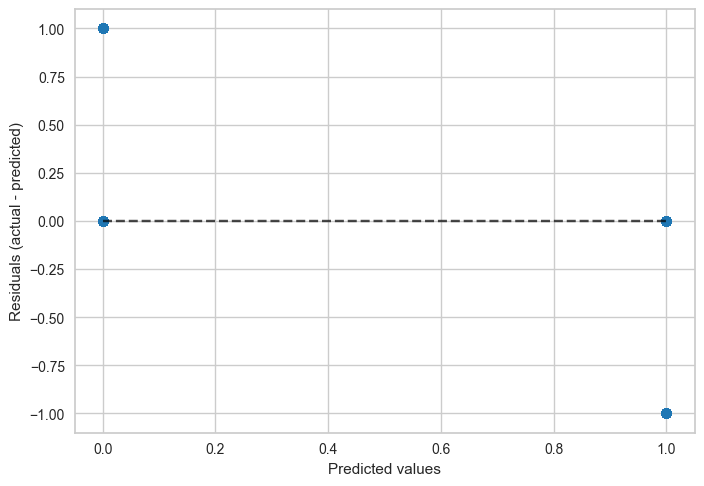

In [324]:
from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_estimator(my_pipeline,xtest,ytest)
PredictionErrorDisplay.from(my_pipeline,xtest,ytest)

##### *C.1.7*<br> <u>*Visualize Best Model :*</u>

In [118]:
unique_labels(ytest)
labels=unique_labels(ytest)
col_names=[f"predicted{label}"for label in labels ]
index_names=[f"Actual{label}"for label in labels ]
pd.DataFrame(confusion_matrix(ytest, model.predict(xtest)),columns=col_names,index=index_names)

,predicted0,predicted1
Actual0,6233,1450
Actual1,3442,2447


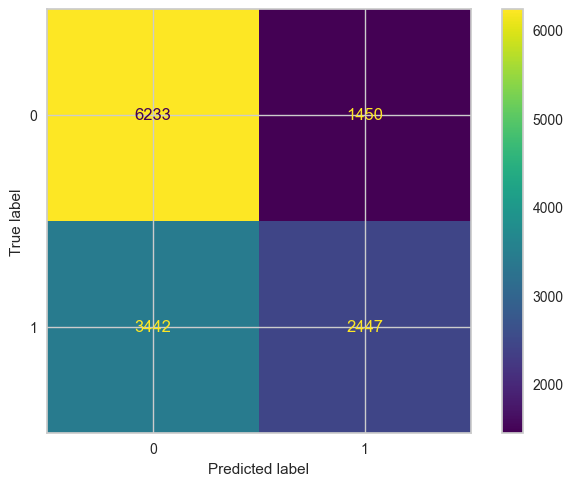

In [120]:
ConfusionMatrixDisplay(confusion_matrix(ytest, model.predict(xtest)),display_labels=model.classes_).plot()

##### *C.1.8*<br> <u>*Visualize The classification_report :*</u>

In [121]:
classes = ["Male", "Femle"]
visualizer = ClassificationReport(GradientBoostingClassifier(), classes=classes, support=True)

AttributeError: 'Pipeline' object has no attribute 'show'

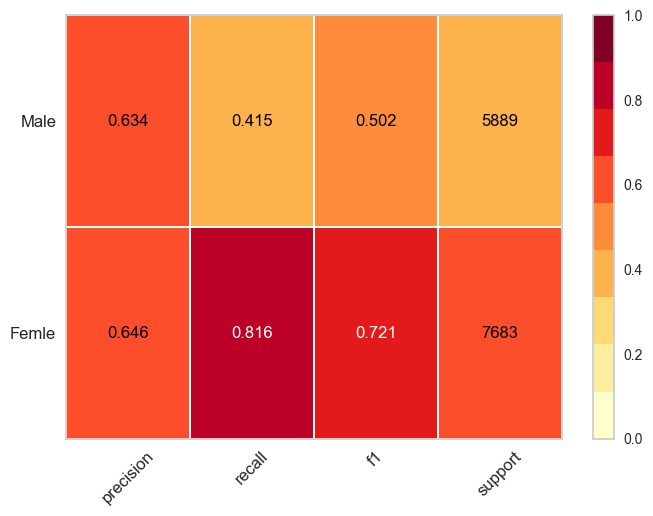

In [122]:
visualizer_Plot= Pipeline(steps=[('preprocessor', preprocessor),
                              ('melbourne_model', visualizer)# or ('melbourne_model', RandomForestRegressor(random_state=0,n_estimators=50)) 
                             ])
visualizer_Plot.fit(xtrain, ytrain)        # Fit the visualizer and the model
visualizer_Plot.score(xtest, ytest)        # Evaluate the model on the test data
visualizer_Plot.show()

##### *C.1.9*<br> <u>*ROC-CURVE :*</u>

* ##### *Area Under Curve (auc)*

In [255]:
auc = roc_auc_score(ytest, preds)
auc_m=roc_auc_score(ytest, my_pipeline.predict_proba(xtest)[:,1])
auc_f=roc_auc_score(ytest, my_pipeline.predict_proba(xtest)[:,0])
print('AUC: %.3f' % auc)
print('AUC: %.3f' % auc_m)
print('AUC: %.3f' % auc_f)


AUC: 0.616
AUC: 0.666
AUC: 0.334


* ##### *Area Under Curve (auc) Visualization :*

In [239]:
print(my_pipeline.predict_proba(xtest))
print('='*35)
print(preds)
print('='*35)
print(my_pipeline.predict_proba(xtest)[:,1])

[[0.29912914 0.70087086]
 [0.26168941 0.73831059]
 [0.71492911 0.28507089]
 ...
 [0.51866659 0.48133341]
 [0.65017576 0.34982424]
 [0.63553445 0.36446555]]
[1 1 0 ... 0 0 0]
[0.70087086 0.73831059 0.28507089 ... 0.48133341 0.34982424 0.36446555]


In [258]:
fpr, tpr, thresholds= roc_curve(ytest,my_pipeline.predict(xtest))
fpr_M, tpr_M, thresholds_M = roc_curve(ytest,my_pipeline.predict_proba(xtest)[:,1])
fpr_f, tpr_f, thresholds_f = roc_curve(ytest,my_pipeline.predict_proba(xtest)[:,0])   #false positive rate,true positive rate

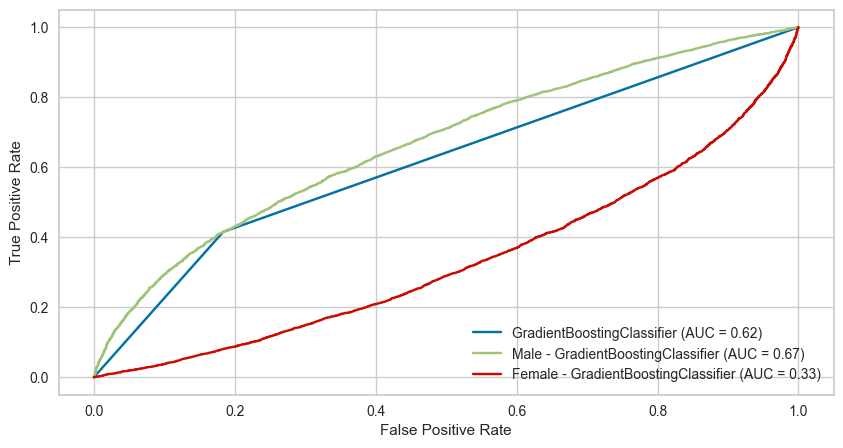

In [262]:
fig,ax=plt.subplots(figsize=(10,5))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc,estimator_name='GradientBoostingClassifier').plot(ax=ax);
RocCurveDisplay(fpr=fpr_M, tpr=tpr_M, roc_auc=auc_m,estimator_name='Male - GradientBoostingClassifier').plot(ax=ax);
RocCurveDisplay(fpr=fpr_f, tpr=tpr_f, roc_auc=auc_f,estimator_name='Female - GradientBoostingClassifier',).plot(ax=ax);

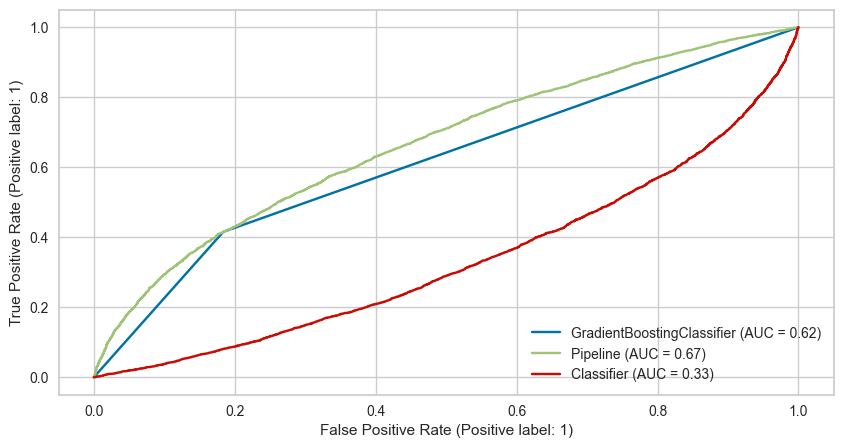

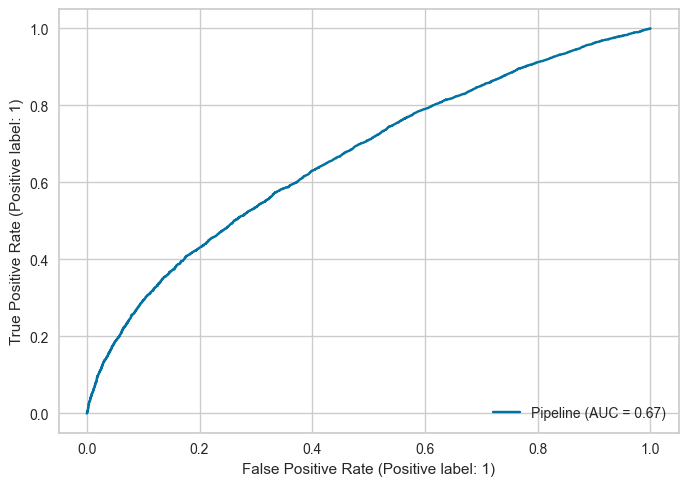

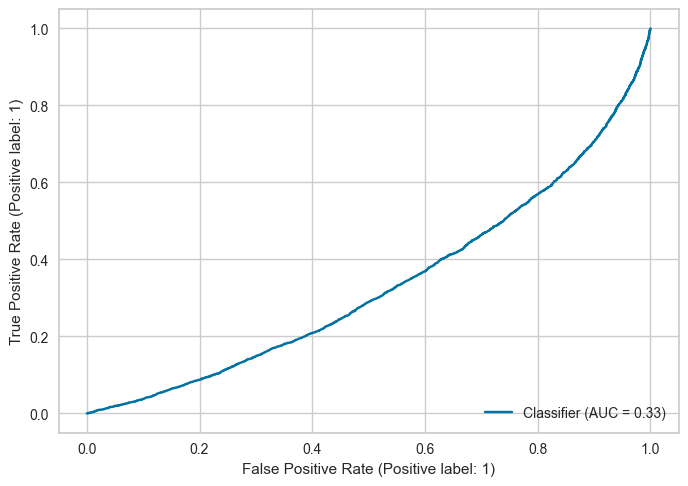

In [280]:
fig,ax=plt.subplots(figsize=(10,5))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc,estimator_name='GradientBoostingClassifier').plot(ax=ax);
RocCurveDisplay.from_estimator(my_pipeline,xtest,ytest).plot(ax=ax)
RocCurveDisplay.from_predictions(ytest,my_pipeline.predict_proba(xtest)[:,0]).plot(ax=ax)

### PrecisionRecallDisplay¶

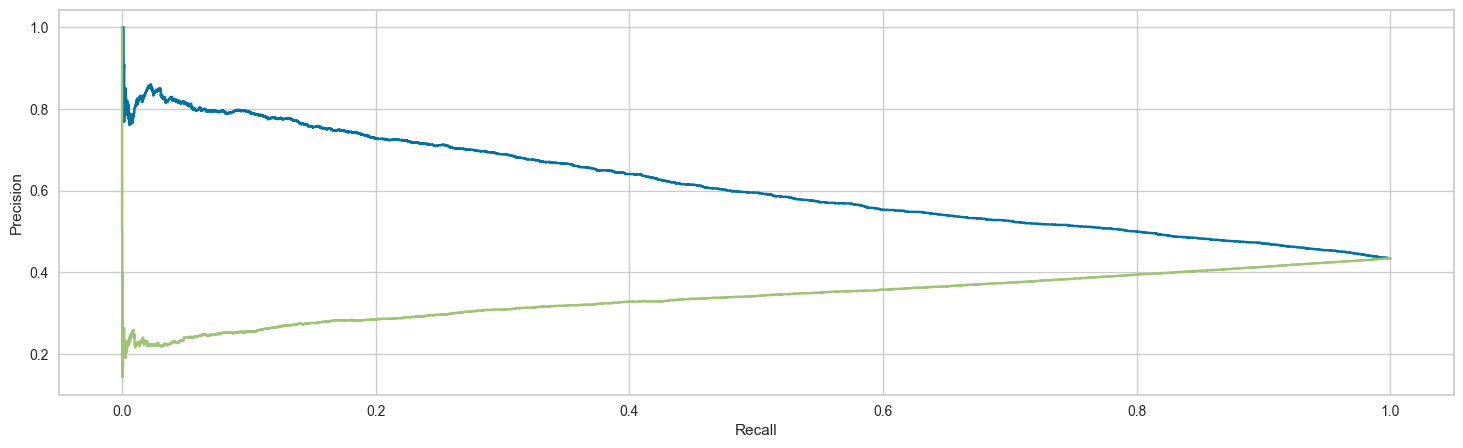

In [313]:
from sklearn.metrics import (precision_recall_curve,
                             PrecisionRecallDisplay)

precision_m, recall_m, _m = precision_recall_curve(ytest, my_pipeline.predict_proba(xtest)[:,1])
precision_f, recall_f, _f = precision_recall_curve(ytest, my_pipeline.predict_proba(xtest)[:,0])

fig,ax=plt.subplots(figsize=(18,5))
PrecisionRecallDisplay(precision=precision_m, recall=recall_m).plot(ax=ax);
PrecisionRecallDisplay(precision=precision_f, recall=recall_f).plot(ax=ax);


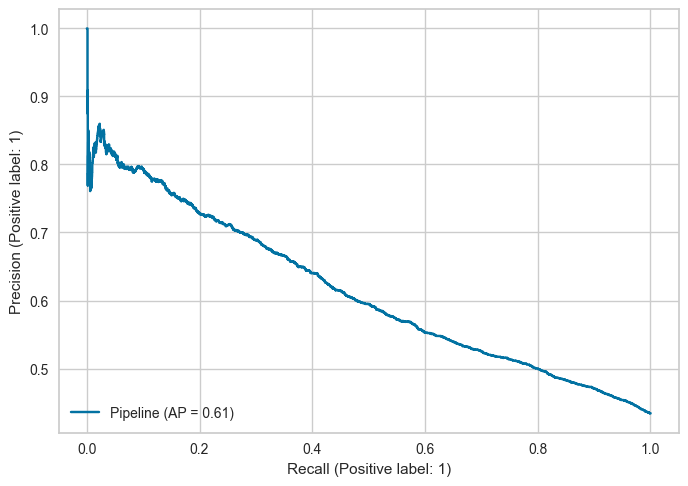

In [314]:
PrecisionRecallDisplay.from_estimator(my_pipeline,xtest,ytest)

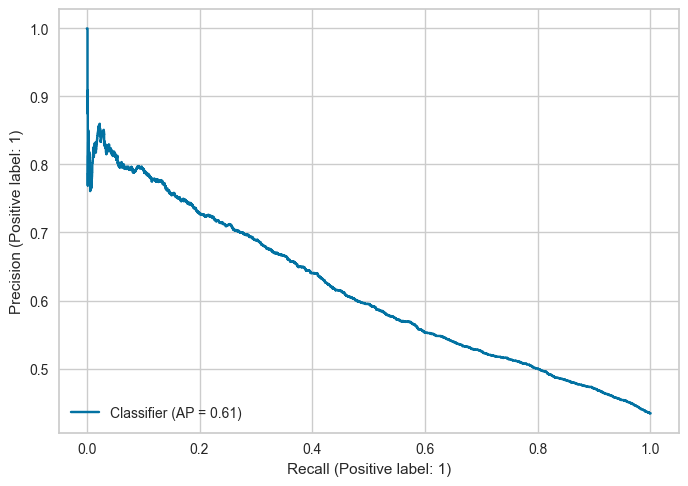

In [317]:
PrecisionRecallDisplay.from_predictions(ytest,my_pipeline.predict_proba(xtest)[:,1])

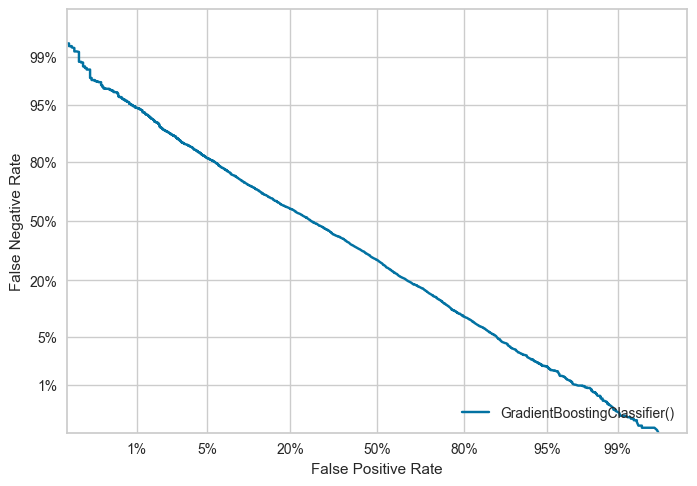

In [285]:
from sklearn.metrics import det_curve, DetCurveDisplay
fpr, fnr, _ = det_curve(ytest, my_pipeline.predict_proba(xtest)[:,1])
DetCurveDisplay(fpr=fpr, fnr=fnr, estimator_name=GradientBoostingClassifier()).plot()

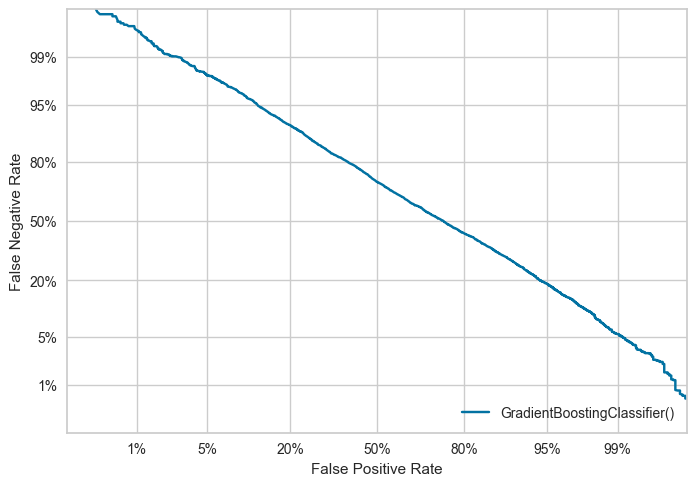

In [294]:
from sklearn.metrics import det_curve, DetCurveDisplay
fpr, fnr, _ = det_curve(ytest, my_pipeline.predict_proba(xtest)[:,0])
DetCurveDisplay(fpr=fpr, fnr=fnr, estimator_name=GradientBoostingClassifier()).plot()


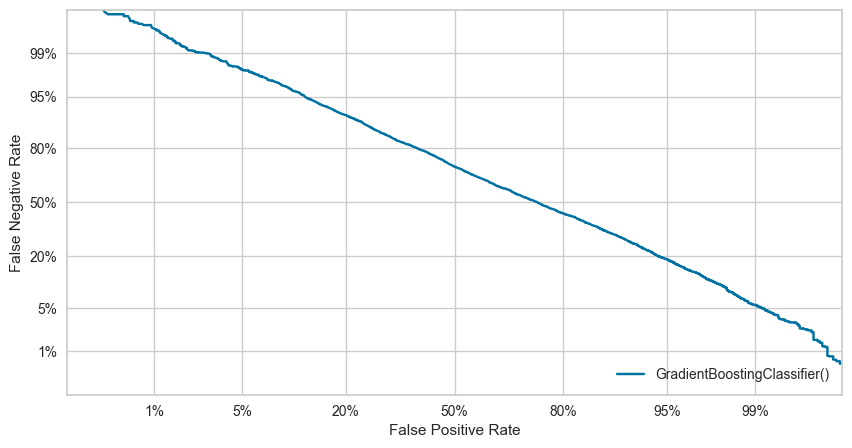

In [292]:
fig,ax=plt.subplots(figsize=(10,5))
DetCurveDisplay(fpr=fpr, fnr=fnr, estimator_name=GradientBoostingClassifier()).plot(ax=ax)

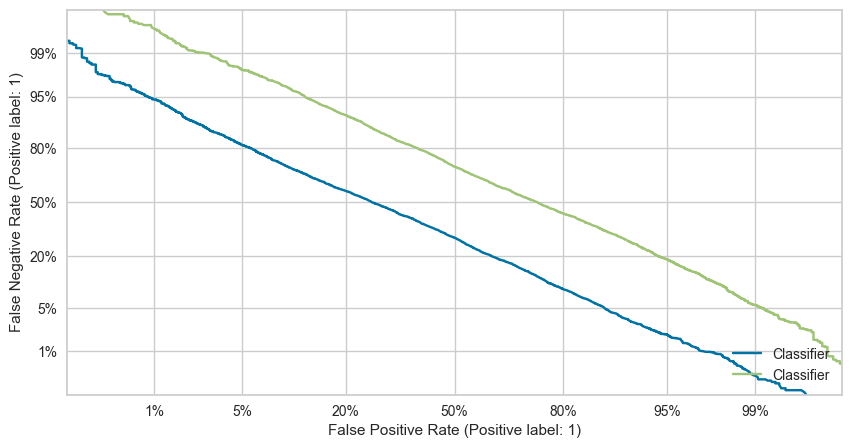

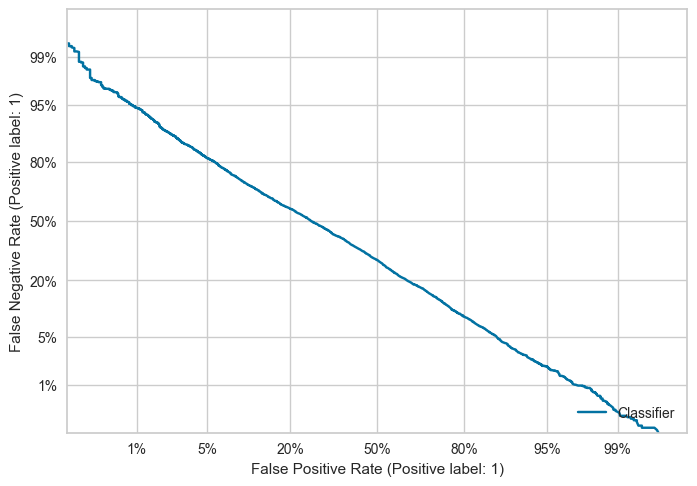

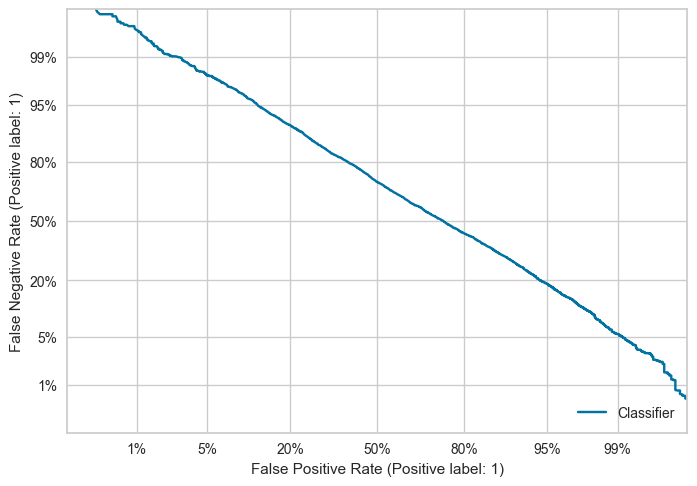

In [311]:
#DetCurveDisplay.from_estimator(my_pipeline,xtest,ytest)
fig,ax=plt.subplots(figsize=(10,5))
DetCurveDisplay.from_predictions(ytest,my_pipeline.predict_proba(xtest)[:,1]).plot(ax=ax)
DetCurveDisplay.from_predictions(ytest,my_pipeline.predict_proba(xtest)[:,0]).plot(ax=ax);


---

In [35]:
# initialize parameters value
plot=plotclassification.plot(y=ytest,
	         y_predict_proba=model.predict_proba(xtest),
	         class_name=["Female","Male"])


In [36]:
plot.class_name
['Femal','male']

['Femal', 'male']

In [37]:
#  confusion matrix plot
plot.plot_confusion_matrix()

In [38]:

plot.plot_classification_report()


In [62]:
# precision recall curve plot
plot.plot_precision_recall_curve()



In [40]:

plot.plot_roc()

# predicted probability histogram plot
#plot_probability_histogram()

----